# Część I
Podczas wykonywania tej listy naszym zadaniem było wypożyczanie rowerów miejskich i sprawdzenie, jak użytkownicy dbają o ich bezpieczeństwo. Rowery były podzielone na dwie kategorie. Pierwsza - zapięte na zamek elektroniczny. Druga - zapięte na spinkę. Poniższa tabela pokazuje dane z eksperymentu. Zadanie wykonywałem razem z innymi studentami Informatyki na WPPT.

In [1]:
import pandas as pd
data = pd.read_csv('rowery.csv')
data

,BicycleId,ProperCode,SeenCode,MagneticLock
0,57713,4924,2296,1
1,57615,4702,4702,1
2,57649,9101,9101,1
3,57510,8076,6765,1
4,63729,8290,4000,1
5,57525,6070,6840,0
6,57043,8066,8535,1
7,63720,1625,1956,1
8,57783,8463,8463,1
9,57435,3306,4470,0


Liczba danych w każdej z grup. Jak można zauważyć mam 77 kodów z rowerów. 45 z rowerów przypiętych magnetycznie, 32 przypiętych spinką.

In [2]:
data.groupby('MagneticLock')['BicycleId'].agg(['count'])

,count
MagneticLock,
0,29
1,48


# Część II
W tej części będę szukał rozkładu, z jakim użytokownicy ustawiają zamek. Będę go ustalał na podstawie odległości pomiędzy kodem poprawnym, a kodem na spince. Odległość jest zdefiniowana, jako minimalna suma przesunięć, jaka trzeba wykonać, aby uzyskać prawidłowy kod.

### Obliczenie dystansu dla każdego rekrodu:
Poniższa tabela pokazuje dystanse pomiędzy kodem poprawnym (ProperCode) a kodem na kłódce (Seen Code). 

In [4]:
from code_metric import calculate_distance
# calculate the distances
data['Distance'] = data.apply(lambda x: calculate_distance(str(x.ProperCode), str(x.SeenCode)), axis=1)
data.head(5)

,BicycleId,ProperCode,SeenCode,MagneticLock,Distance
0,57713,4924,2296,1,10
1,57615,4702,4702,1,0
2,57649,9101,9101,1,0
3,57510,8076,6765,1,7
4,63729,8290,4000,1,7


### Odległości między kodami dla rowerów przypiętych na zamku magnetycznym

In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


distribution_magnetic_lock = data[['BicycleId', 'Distance']][data.MagneticLock == 1].\
                             groupby('Distance')['BicycleId'].\
                             agg(['count'])
        
tmp = pd.DataFrame(index=range(distribution_magnetic_lock.index.max()))
distribution_magnetic_lock = tmp.merge(distribution_magnetic_lock,
                                 how='left',
                                 left_index=True, right_index=True)
distribution_magnetic_lock = distribution_magnetic_lock.fillna(0)
distribution_magnetic_lock

,count
0,4.0
1,9.0
2,4.0
3,6.0
4,1.0
5,0.0
6,2.0
7,7.0
8,1.0
9,3.0


### Odległości między kodami dla rowerów przypiętych na spince

In [6]:
distribution_chained = data[['BicycleId', 'Distance']][data.MagneticLock == 0].\
                       groupby('Distance')['BicycleId'].\
                       agg(['count'])
tmp = pd.DataFrame(index=range(distribution_magnetic_lock.index.max()))
distribution_chained = tmp.merge(distribution_chained,
                                 how='left',
                                 left_index=True, right_index=True)
distribution_chained = distribution_chained.fillna(0)
distribution_chained

,count
0,1.0
1,0.0
2,6.0
3,1.0
4,4.0
5,3.0
6,3.0
7,2.0
8,1.0
9,2.0


### Wykresy liczby rowerów od odległości między kodami dla obu kategorii.

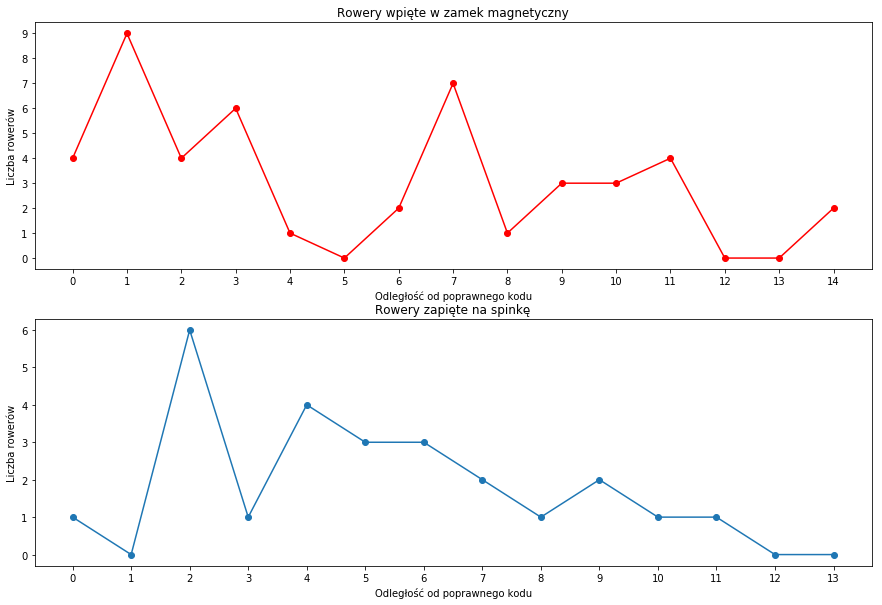

In [7]:
plt.subplots_adjust(top=10)
fig, ax = plt.subplots(2, 1, figsize=(15,10))
ax[0].plot(distribution_magnetic_lock.index.values, distribution_magnetic_lock['count'], 'ro-')
ax[0].set_title('Rowery wpięte w zamek magnetyczny')

ax[1].plot(distribution_chained.index.values, distribution_chained['count'], 'o-')
ax[1].set_title('Rowery zapięte na spinkę')
for axis in ax.flat:
    axis.set(ylabel='Liczba rowerów', xlabel='Odległość od poprawnego kodu')
for axis in ax.flat:
    axis.yaxis.set_major_locator(MaxNLocator(integer=True))
ax[0].set_xticks(range(max(distribution_magnetic_lock.index.values) + 1))
ax[1].set_xticks(range(max(distribution_chained.index.values) + 1))
plt.show()

Zobaczmy jaką częścią całości są rowery zabezpieczone kodami w konkretnej odległości.

In [8]:
import numpy as np
distribution_chained = distribution_chained.assign(Cumsum=distribution_chained['count'].cumsum())
distribution_magnetic_lock = distribution_magnetic_lock.assign(Cumsum=distribution_magnetic_lock['count'].cumsum())

max_chained = max(distribution_chained.Cumsum)
distribution_chained = distribution_chained.\
                       assign(CumsumPercentage=distribution_chained.Cumsum / max_chained)

max_magnetic = max(distribution_magnetic_lock.Cumsum)
distribution_magnetic_lock = distribution_magnetic_lock.\
                             assign(CumsumPercentage=distribution_magnetic_lock.Cumsum / max_magnetic)

### Wykresy skumulowanej sumy kodów od odległości pomiędzy kodami.

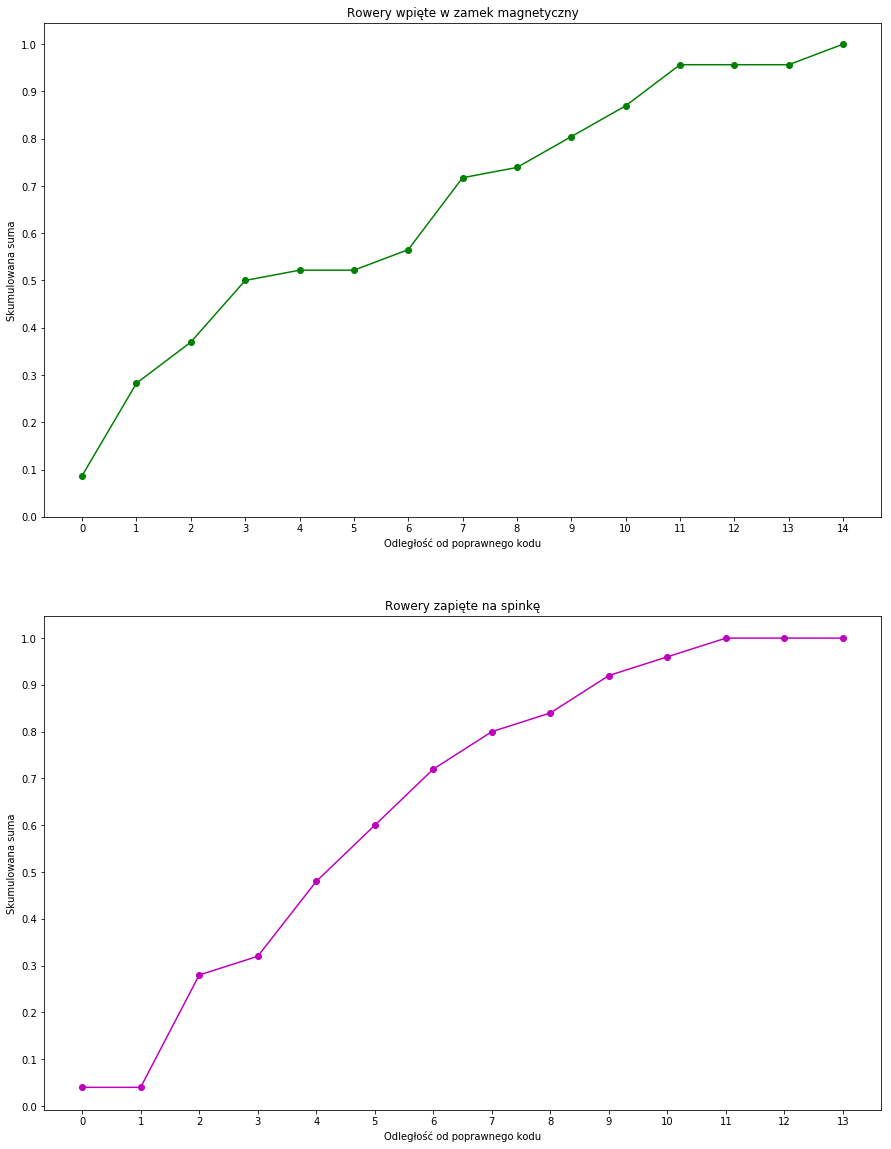

In [9]:
fig, ax = plt.subplots(2, 1, figsize=(15,20))
ax[0].plot(distribution_magnetic_lock.index, distribution_magnetic_lock.CumsumPercentage, 'go-')
ax[0].set_title('Rowery wpięte w zamek magnetyczny')

ax[1].plot(distribution_chained.index, distribution_chained.CumsumPercentage, 'mo-')
ax[1].set_title('Rowery zapięte na spinkę')
for axis in ax.flat:
    axis.set(xlabel='Odległość od poprawnego kodu', ylabel='Skumulowana suma')
    axis.set_yticks(np.arange(0, 1.01, 0.1))
ax[0].set_xticks(range(max(distribution_magnetic_lock.index.values) + 1))
ax[1].set_xticks(range(max(distribution_chained.index.values) + 1))
plt.show()

### Entropia odległości kodów
Entropia została wyliczona wg wzoru:
\begin{equation*}
-\sum _{i=1}^{n}p(x_{i})\log _{r}{p(x_{i})}
\end{equation*}
gdzie $p(x)$ jest to prawdopodobieństwo wystąpienia danej odległości kodu poprawnego od widzianego na zamku. Mówi ona między innymi o tym, jak dużo jest szumu w danych.

In [27]:
from scipy.stats import entropy


def calculate_entropy(distribution):
    probabilities = distribution['count'] / distribution['count'].sum()
    entropy_value = entropy(probabilities)
    return entropy_value

print(f'Entropia dla przypiętych spinką {calculate_entropy(distribution_chained)}')
print(f'Entropia dla przypiętych na zamku magentycznym {calculate_entropy(distribution_magnetic_lock)}')

Entropia dla przypiętych spinką 2.1924759563043477
Entropia dla przypiętych na zamku magentycznym 2.3037121825223856


### Wnioski z części II

Jak można zaobserwować na obu sposbach przedstawienia danych ponad 35% kodów jest w odległości zaledwie dwóch przesunięć. Oznacza to, że rowery są naprawdę źle zabezpieczane przez użytkowników. W 26 na 77 rowerów, których kody na kłódkach są oddalone o 2 od tych rzeczywistych, potencjalny złodziej musiałby sprawdzić co najwyżej 66 kombinacji.  
  
Ponad 70% rowerów zabezpieczonych jest poprzez co najwyżej 6 przekręceń na kłódce, gdy nie są zabezpieczone przez zamek magnetyczny.  
  
Mówiąc o rozkładzie kodów. Pomimo małego zbioru danych i dość dużego szumu (o czym świadczy poziom entropii w obu kategoriach) skłaniałbym się do stwierdzenia, że jest to rozkład normalny. Oba przesunięte w prawo od punktu (0, 0) o (1, 0) i (2, 0) odpowiednio dla zapiętych na zamek magentyczny i spinkę.Przesunięcie to może być spowodowane tym, że ludzie próbują dbać o bezpieczeństwo rowerów przypinanych spinką.  
    
Szum w danych może być spowodowany tym, że użytkownicy przypinający rower zamkiem magnetycznym nie ruszają spinek. W miarę dobrze zabezpieczona spinka zostaje wtedy przez mnie odczytana i wpisana do pierwszej z kategorii (widoczny wzrost liczby kodów oddalonych o siedem od poprawnego).  

# Część III
Wykorzystując obserwacje z poprzedniej części możemy stwierdzić, że część systemów może stać się bezużyteczna przy takim zachowaniu użytkowników. Dla systemu, w którym mamy zaledwie 4-cyfrowy pin odepnięcie roweru byłoby trywialne. W 30% rowerów przypiętych spinką potrzebowalibyśmy sprawdzić co najwyżej 30 kombinacji. Trwałoby to dla wprawnego człowieka sekundy. Dla kłódki z pinem 8 cyfrowym, która ma 10^8 możliwych kombinacji, w 70% rowerów wystarczyłoby sprawdzenie co najwyżej 1604 z nich. Kłódki z pinem alfanumerycznym niczym by się nie różniły od wcześniej przedstawionych. W żaden sposób nie wpływają one na rozłożenie odległości (czyli sumy minimalnych przesunięć) na poszczególne znaki.

Pod koniec listy zostało zadane pytanie, jak mozna zauwazyc, ze dane są wygenerowane, a nie samodzielnie zdobyte. Przede wszystkim najłatwiejszym sposobem jest sprawdzenie kodów, które pojawiają się w pracach studentów, oczywiście uwzględniając daty zdobycia. Kody w spinkach z tego, co wiem są cyklicznie zmieniane - raz w miesiącu. Stąd jeśli numer roweru i prawidłowy kod różnią się w dwóch pracach i czas pozyskania między nimi jest mniejsza od miesiąca możemy zacząć przypuszczać, że dane są generowane.
Drugim sposobem jest spojrzenie na rozkłady odległości. Generowane kody przez komputer będą najprawdopodobniej ułożone wg rozkładu normalnego, gdzie na wykresach możemy zauważyć, że jest to przesunięty rozkład normalny do tego z całkiem dużym szumem.
